In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

#converting to dataframe
iris_df = pd.DataFrame(data = iris.data, columns =iris.feature_names)

#filtering out target
iris_df['target'] = iris.target

**Exploartory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**DATA CLEANING AND DATA STATISTICS VISUALIZATION**

In [ ]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#any null values
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


**PAIR PLOT**

In [ ]:
##what target is basically?
iris_df['target'].head(5)

,target
0,0
1,0
2,0
3,0
4,0


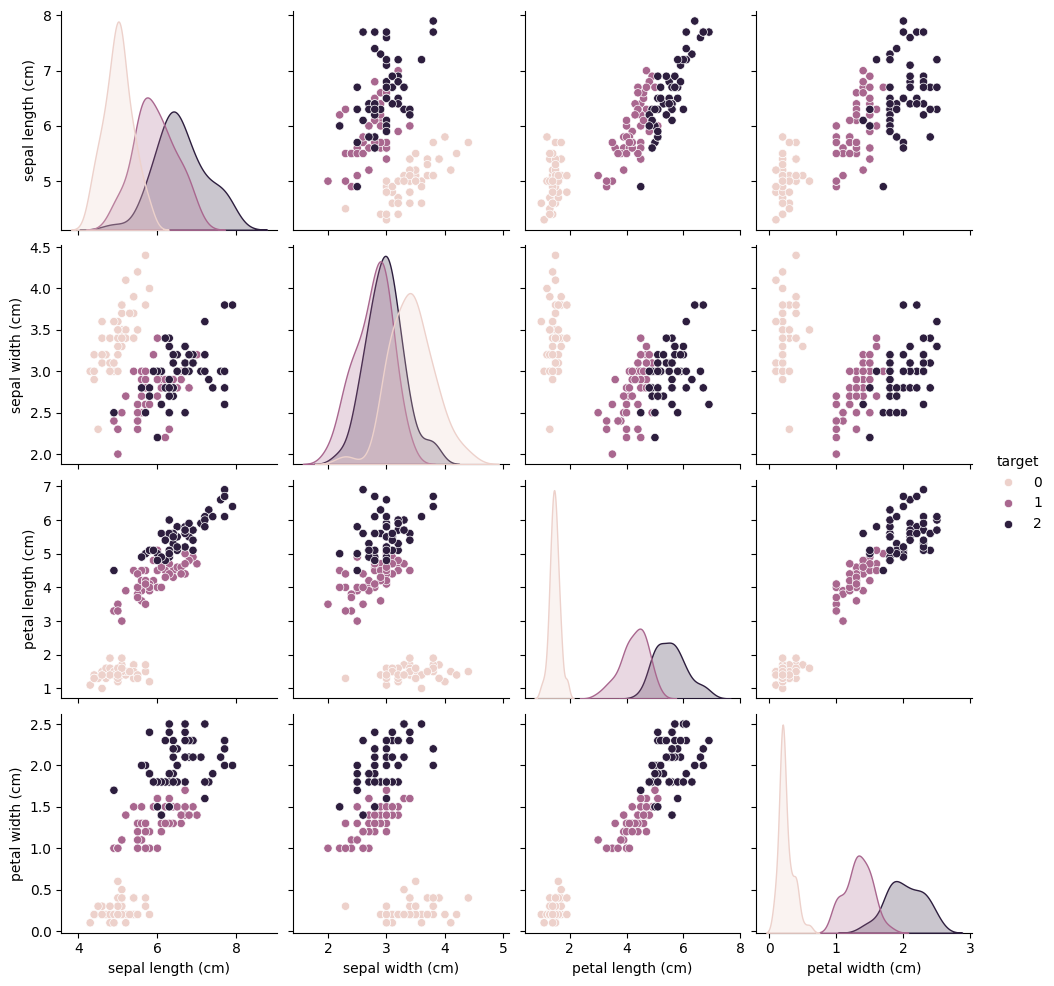

In [ ]:
sns.pairplot(iris_df,hue='target')
plt.show()

#Pair plots are particularly useful for:

#1.Identifying Correlations:
By showing scatter plots for each variable pair, it becomes easy to see if two variables have a linear or non-linear correlation.
#2.Exploring Distributions:
The diagonal plots help in understanding the distribution of individual variables, such as whether they are skewed, normal, or multimodal.
#3.Detecting Outliers:
Outliers and anomalies in data often appear clearly in scatter plots.

##CORRELATION MATRIX

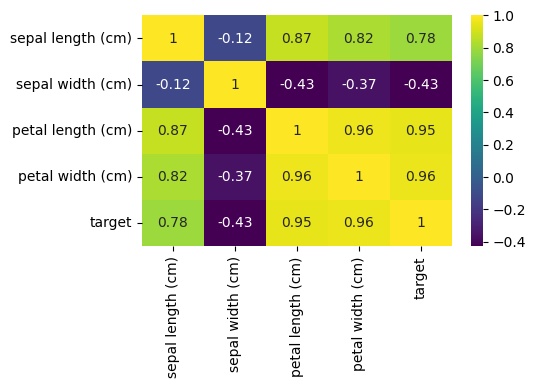

In [ ]:
plt.figure(figsize=(5,3))
iris_df_corr = iris_df.corr()
sns.heatmap(iris_df_corr, annot=True, cmap='viridis',cbar=True)
plt.show()


1. Correlation coefficients range from -1 to +1.
2. +1 indicates a perfect positive relationship (when one variable increases, the other also increases).
3. -1 indicates a perfect negative relationship (when one variable increases, the other decreases).
4. 0 means no linear correlation.

#DATA SPLITTING

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X = iris_df.drop('target',axis=1)
y = iris_df['target']

#splitting into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier =  KNeighborsClassifier(n_neighbors=3)

#fitting model on train dataset
knn_classifier.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation


#Making Predictions

In [ ]:
y_pred = knn_classifier.predict(X_test)

#Accuracy Measurement

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")

Accuracy of KNN model: 100.00%


#Classification Report

A classification report is a summary of performance metrics for evaluating a classification model. It provides key statistics that help assess how well the model performs across each class, particularly in multi-class classification problems.

In [ ]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Confusion Matrix

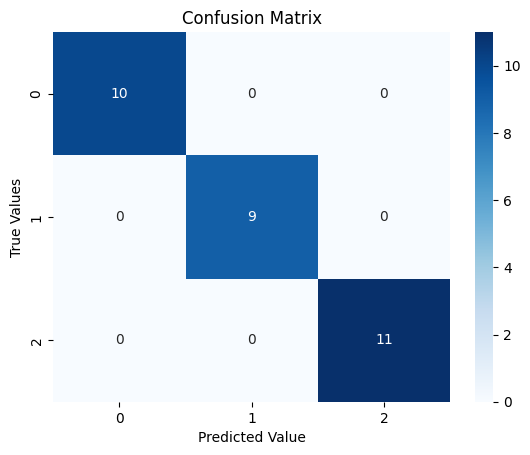

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
#plotting heatmap for confusion matrix
sns.heatmap(conf_matrix,annot = True, cmap = 'Blues', cbar=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()


#CONFUSION MATRIX
A confusion matrix is a table used to evaluate the performance of a classification model by comparing predicted labels with actual labels. It provides a summary of prediction results, making it a powerful tool for understanding classification accuracy across different classes.



A confusion matrix has rows for actual classes and columns for predicted classes (or vice versa).
It consists of four main components for binary classification:
1.True Positives (TP): Correctly predicted positive instances.

2.True Negatives (TN): Correctly predicted negative instances.

3.False Positives (FP): Incorrectly predicted positive instances (also known as Type I errors).

4.False Negatives (FN): Incorrectly predicted negative instances (also known as Type II errors).

This confusion matrix shows the performance of a multi-class classification model with three classes, labeled as 0, 1, and 2. Here’s what each part of the matrix indicates:

#Class 0:

**True Positives (TP):** 10 instances of class 0 were correctly predicted as class 0.
**False Positives (FP): **0 instances from other classes were incorrectly predicted as class 0.
**False Negatives (FN):** 0 instances of class 0 were incorrectly predicted as another class.

#Class 1:

**True Positives (TP):** 9 instances of class 1 were correctly predicted as class 1.
**False Positives (FP):** 0 instances from other classes were incorrectly predicted as class 1.
**False Negatives (FN):** 0 instances of class 1 were incorrectly predicted as another class.

#Class 2:

**True Positives (TP):** 11 instances of class 2 were correctly predicted as class 2.
**False Positives (FP):** 0 instances from other classes were incorrectly predicted as class 2.
**False Negatives (FN):** 0 instances of class 2 were incorrectly predicted as another class.

#Summary:
The matrix shows that the model achieved perfect classification accuracy for each class.

##K-MEANS CLUSTERING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [ ]:
hs_df = fetch_california_housing()
hs_df = pd.DataFrame(data=hs_df.data, columns=hs_df.feature_names)
hs_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


#Features to Cluster

In [ ]:
faetures = hs_df[['MedInc','AveRooms']]

#Feature Scaling:
#Why Scale Features?

**Consistent Range:** Features often have different units and scales (e.g., age in years, salary in dollars). Without scaling, some features with larger values can dominate others, affecting the model’s performance.

**Distance-Based Models:** Algorithms like K-Nearest Neighbors (KNN) and Support Vector Machines (SVM) depend on distance calculations between data points. Scaling ensures that all features contribute equally to these distance calculations.


In [ ]:
scaling = StandardScaler()
scaled_features = scaling.fit_transform(faetures)

#Applying K-Means

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
hs_df['Cluster'] = kmeans.fit_predict(scaled_features)

#addign a new column in the dataset
hs_df[['MedInc','AveRooms','Cluster']].head(5)

,MedInc,AveRooms,Cluster
0,8.3252,6.984127,1
1,8.3014,6.238137,1
2,7.2574,8.288136,1
3,5.6431,5.817352,1
4,3.8462,6.281853,0


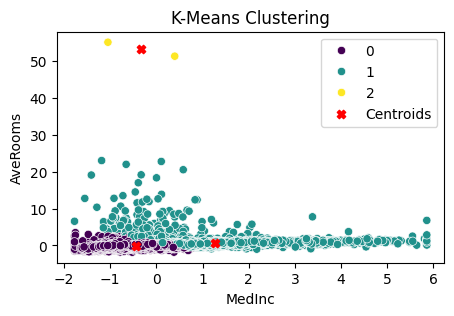

In [ ]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=hs_df['Cluster'], palette='viridis')
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='X', color='red', label='Centroids')
plt.xlabel('MedInc')
plt.ylabel('AveRooms')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

#Elbow Method:
To find the best number of clusters for grouping data, avoiding overfitting (too many clusters) or underfitting (too few clusters)

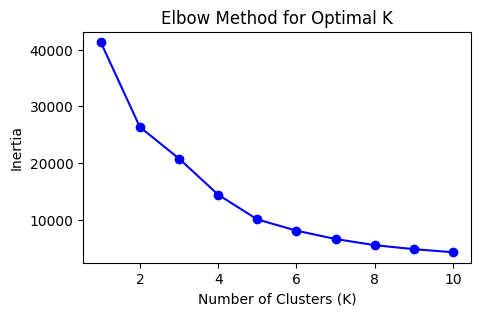

In [ ]:
inertia = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(5,3))
plt.plot(K_values, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

#HOME TASK ----K-NEAREST NEIGHBOUR----

#STUDENT PERFORMANCE DATASET

In [ ]:
import pandas as pd

data_path = 'Student_Performance.csv'
student_data = pd.read_csv(data_path)



In [ ]:
student_data.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

le = LabelEncoder()
student_data['Extracurricular Activities'] = le.fit_transform(student_data['Extracurricular Activities'])



# Separate features and target variable


In [ ]:

X = student_data.drop('Performance Index', axis=1)
y = student_data['Performance Index']




# Split the data into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Standardize the features


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying K-Nearest Neighbors (KNN) Regressor


In [ ]:


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)



# Model Evaluation


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 8.56258
R^2 Score: 0.9768944309139496


#Pair Plot

<Figure size 1000x800 with 0 Axes>

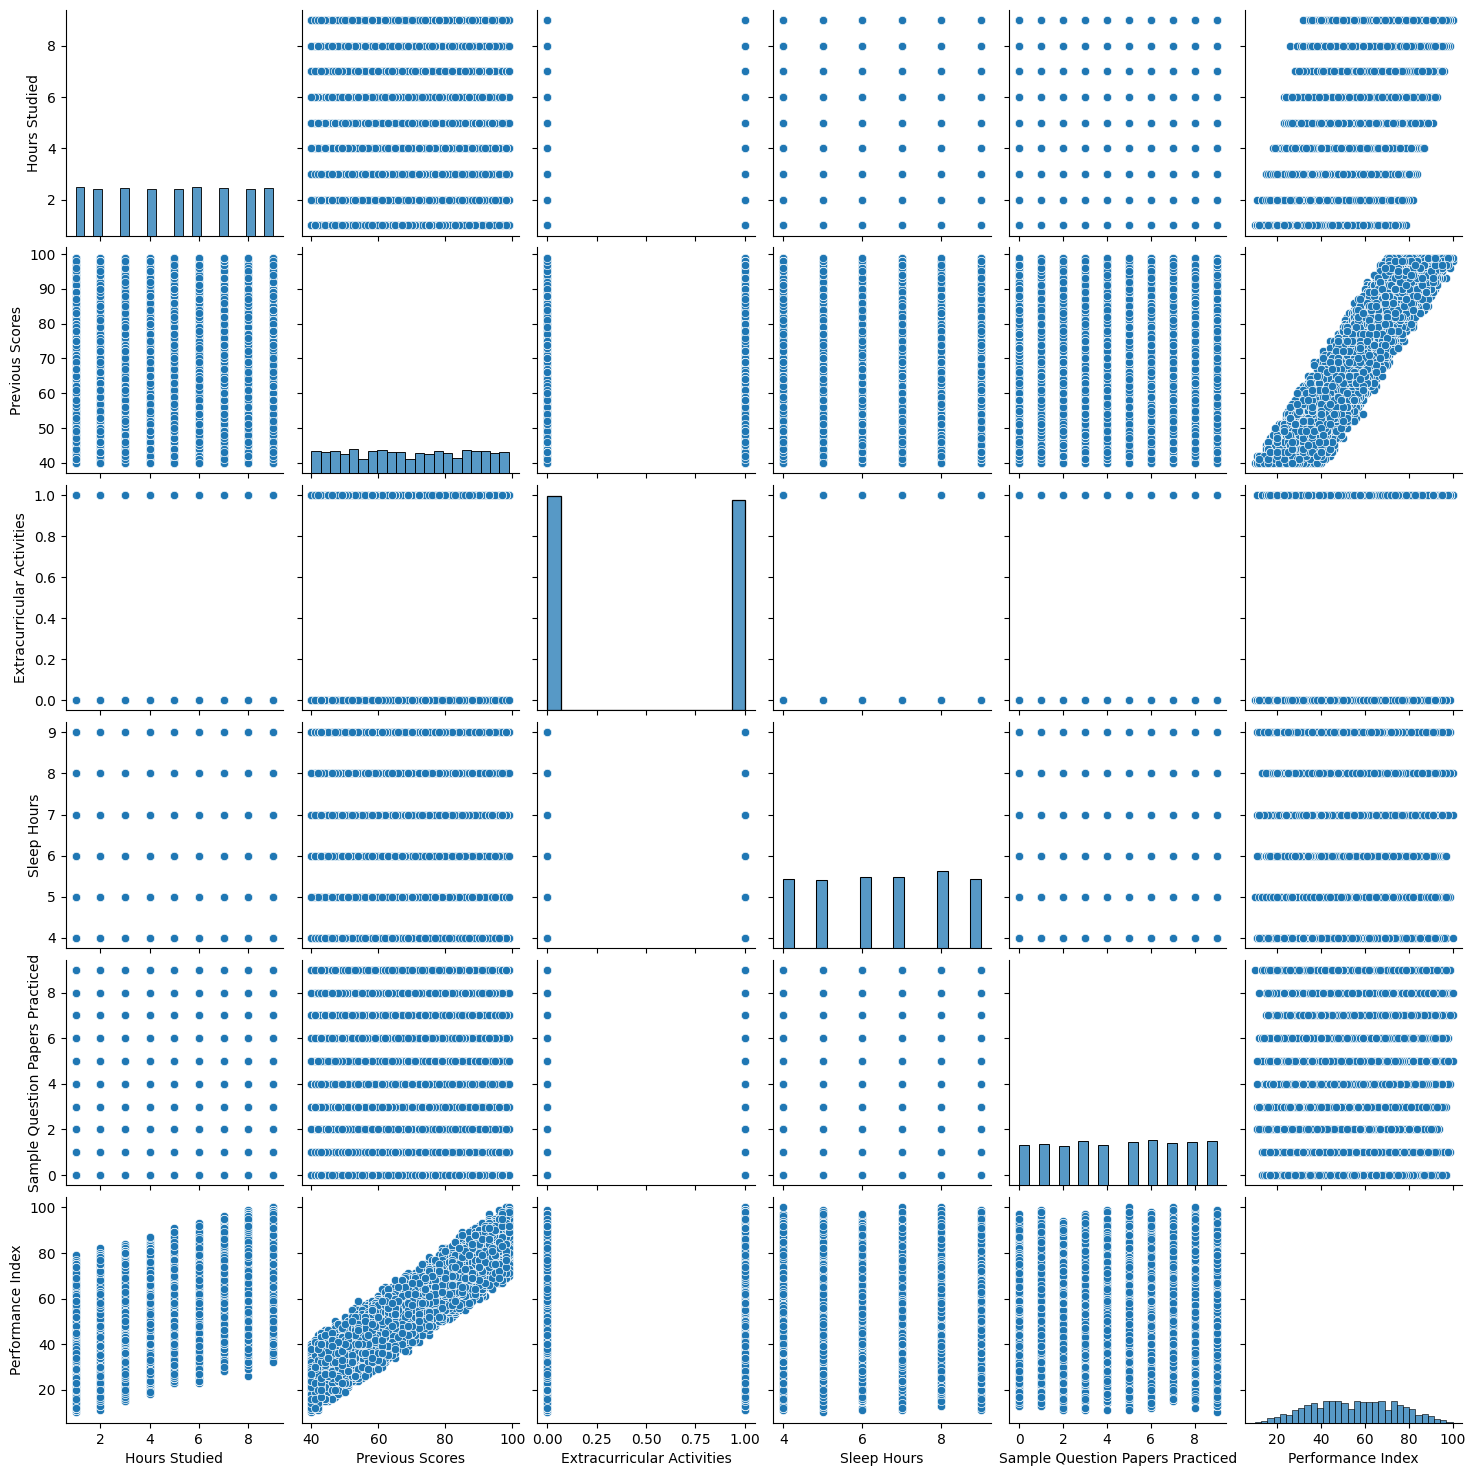

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pair plot for the dataset to observe relationships between features
plt.figure(figsize=(10, 8))
sns.pairplot(student_data)
plt.show()


#Correlation Matrix

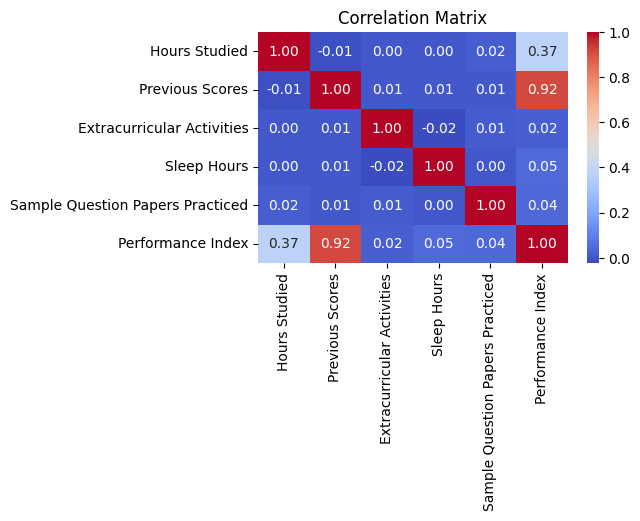

In [ ]:
corr_matrix = student_data.corr()

plt.figure(figsize=(5,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


#K-MEANS CLUSTERING

In [ ]:
data_path = 'BankChurners.csv'
bnk_data = pd.read_csv(data_path)

In [ ]:
bnk_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:

bnk_data = bnk_data.drop(bnk_data.columns[21:], axis=1)
bnk_data.head(5)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# features for clustering


In [ ]:
features = bnk_data[['Total_Trans_Ct', 'Total_Trans_Amt']]


#Scale the features


In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#Elbow Method

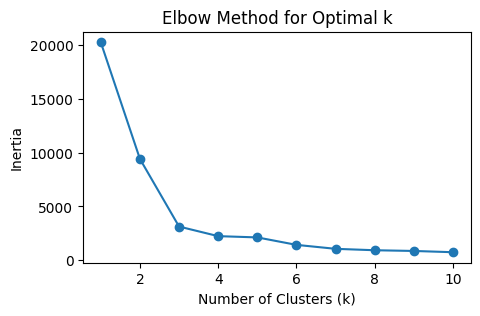

In [ ]:
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(5,3))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#K-Means

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
bnk_data['Cluster'] = kmeans.fit_predict(features_scaled)

In [ ]:
print(bnk_data[['Total_Trans_Ct', 'Total_Trans_Amt', 'Cluster']].head())

   Total_Trans_Ct  Total_Trans_Amt  Cluster
0              42             1144        0
1              33             1291        0
2              20             1887        0
3              20             1171        0
4              28              816        0


#Cluster Visualization

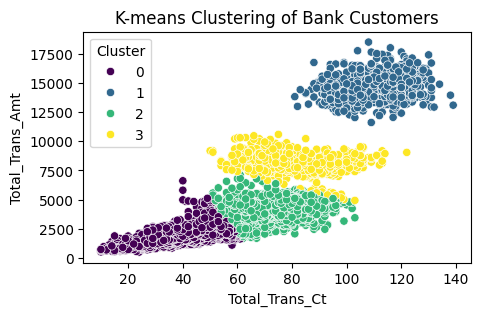

In [ ]:
import seaborn as sns

# Scatter plot of clusters
plt.figure(figsize=(5,3))
sns.scatterplot(data=bnk_data, x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Cluster', palette='viridis')
plt.title("K-means Clustering of Bank Customers")
plt.show()
